In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/stud.csv")
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,standard,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# check unique value in each featurs
for col in data.columns:
    print("-->", str(col),"unique value : ",data[col].unique())
    print()

--> gender unique value :  ['female' 'male']

--> race_ethnicity unique value :  ['group B' 'group C' 'group A' 'group D' 'group E']

--> parental_level_of_education unique value :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

--> lunch unique value :  ['standard' 'free/reduced']

--> test_preparation_course unique value :  ['none' 'completed']

--> math_score unique value :  [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]

--> reading_score unique value :  [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79

In [4]:
df = data.copy()
df.loc[len(df)] = [np.nan] * df.shape[1]

In [5]:
# check data type
data.info()
# data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# check statistic of dataset
# data.describe(include='all')
# data.describe(include=[object])  # only object columns
# data.describe(include=[float])   # only float columns
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
# check number of unique value 
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
data['total_score'] = data['math_score']+data['reading_score'] + data['writing_score']
data['average'] = data['total_score']/3

# Data Visualization

plt.subplots(1, 2) → creates a figure with 1 row and 2 columns of plots (i.e., side-by-side plots).<br>
figsize=(15, 7) → width=15 inches, height=7 inches.<br>
kde=True → Add a KDE (Kernel Density Estimation) curve (smooth line).<br>
hue='gender' → Split histogram by 'gender' column (e.g., male vs female).<br>



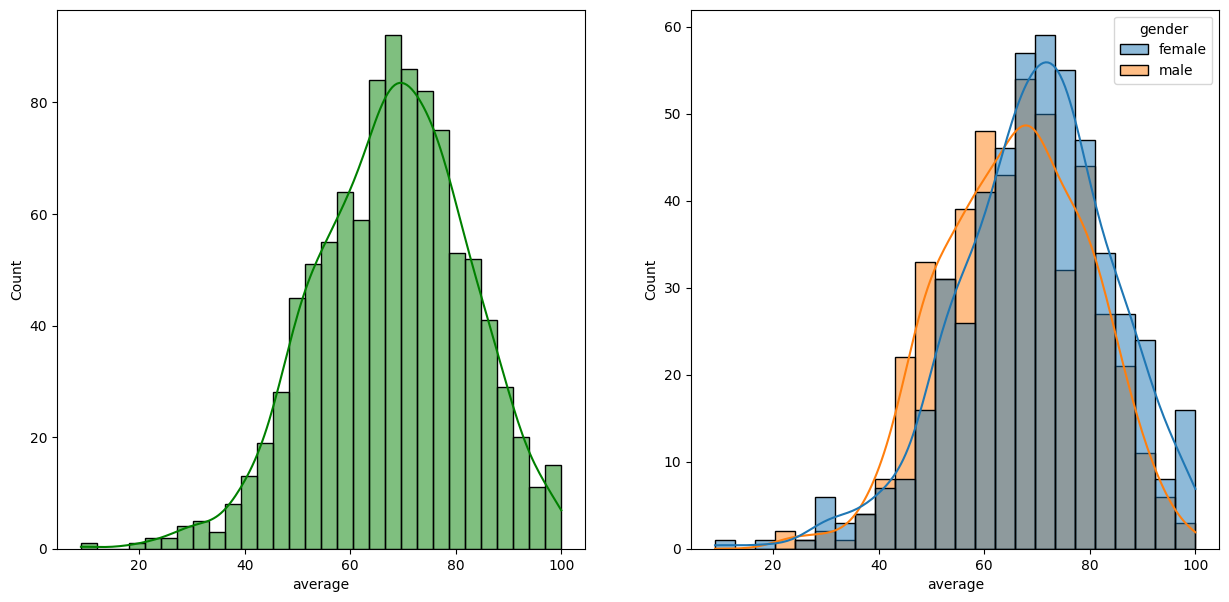

In [9]:
# Histogram
fig,ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='average',kde=True,hue='gender')
plt.show()

<Axes: xlabel='average', ylabel='Count'>

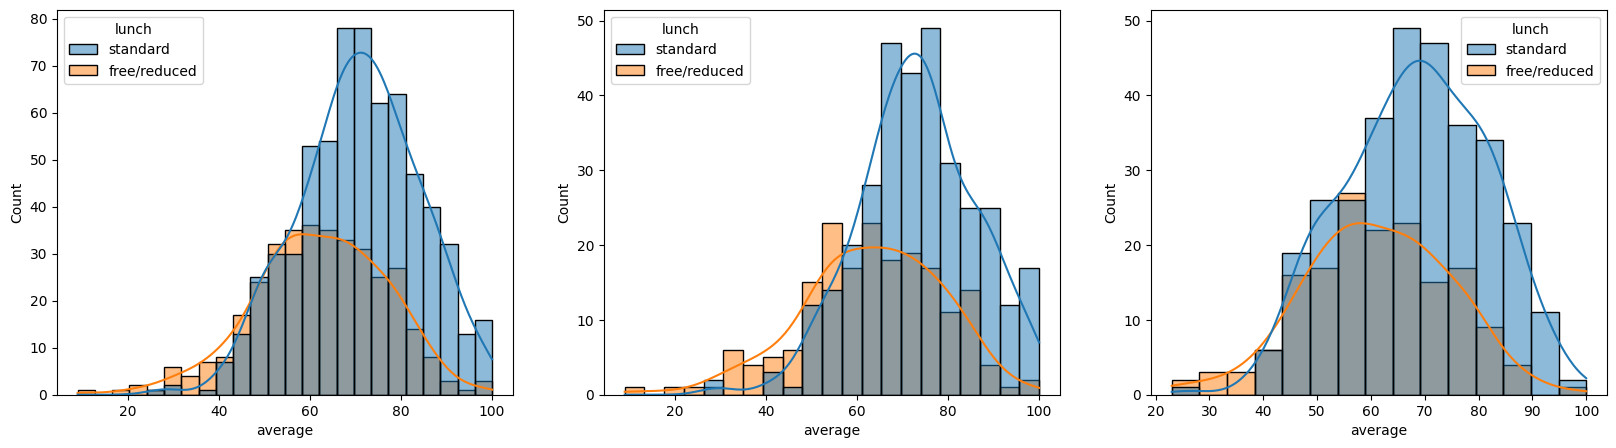

In [10]:
plt.subplots(1,3,figsize=(20,5))
plt.subplot(131)
sns.histplot(data=data,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=data[data['gender']=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=data[data['gender']=='male'],x='average',kde=True,hue='lunch')

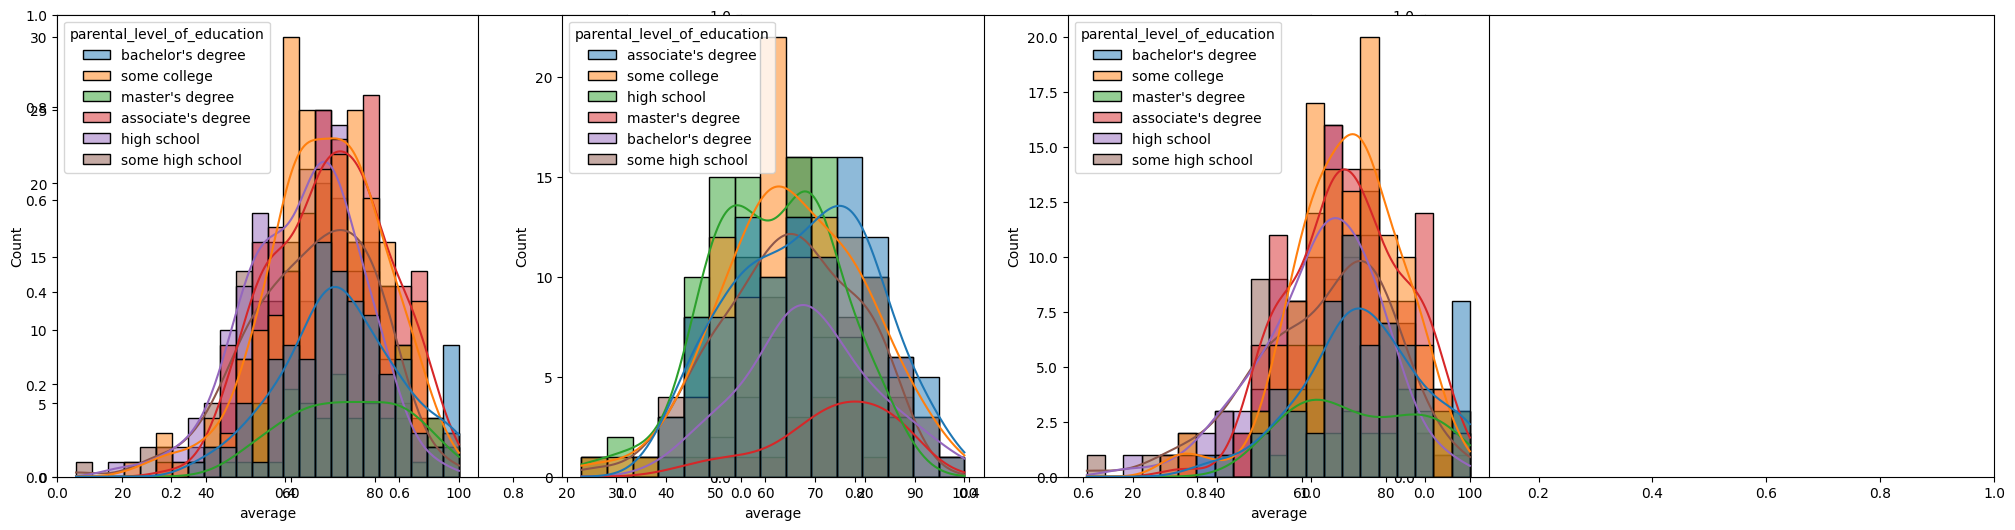

In [11]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,standard,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


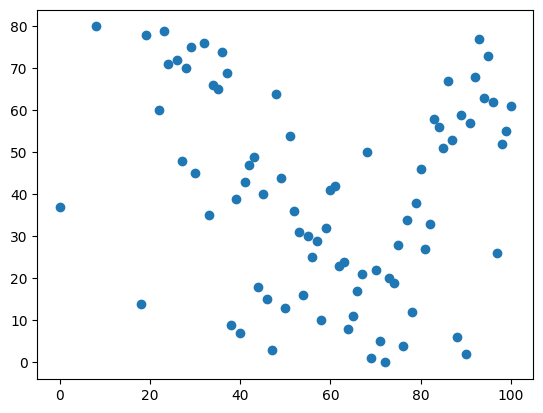

In [13]:
# plt.scatter(data['math_score'],range(10,100))
unique_values = data['math_score'].unique()
plt.scatter(unique_values, range(len(unique_values)))